<a href="https://www.kaggle.com/code/miriamodeyianypeter/sales-data-eda?scriptVersionId=141300303" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
#import pandas as pd
pd.plotting.register_matplotlib_converters()
#import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/online-store-sales-data/Sales-Export_2019-2020.csv


In [2]:
#using the pandas library to read the file
sales_data = pd.read_csv("/kaggle/input/online-store-sales-data/Sales-Export_2019-2020.csv")

In [3]:
#extracting the first five rows in the dataframe
sales_data.head()

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
0,Sweden,"17,524.02",14122.61,2/12/2020,Books,Goldner-Dibbert,Maxie Marrow,Madelon Bront,Mobile,70-0511466
1,Finland,"116,563.40",92807.78,9/26/2019,Games,Hilll-Vandervort,Hube Corey,Wat Bowkley,Mobile,28-6585323
2,Portugal,"296,465.56",257480.34,7/11/2019,Clothing,Larkin-Collier,Celine Tumasian,Smitty Culverhouse,PC,58-7703341
3,Portugal,"74,532.02",59752.32,4/2/2020,Beauty,Hessel-Stiedemann,Celine Tumasian,Aurelie Wren,PC,14-6700183
4,Spain,"178,763.42",146621.76,12/22/2019,Games,Johns and Sons,Emalia Dinse,Bertha Walbrook,Tablet,15-8765160


In [4]:
#to get the summary of the dataframe
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            1000 non-null   object 
 1    order_value_EUR   1000 non-null   object 
 2    cost              1000 non-null   float64
 3   date               1000 non-null   object 
 4   category           1000 non-null   object 
 5   customer_name      1000 non-null   object 
 6   sales_manager      1000 non-null   object 
 7   sales_rep          1000 non-null   object 
 8   device_type        1000 non-null   object 
 9   order_id           1000 non-null   object 
dtypes: float64(1), object(9)
memory usage: 78.2+ KB


# ****Data Cleaning****

Looking closely at the above summary and also the first five rows of our dataframe, there are a few things to note:
1. We have no null values which is excellent for us.
2. Two of our columns have the character space at the beginning of their name so we have to strip that out.
3. The dtype for the columns order_value_EUR and date isn't the appropriate dtype 
4. We also have to remove the commas in the values under the order_value_EUR column

In [5]:
#stripping out the space from the column name
sales_data.columns = sales_data.columns.str.strip(" ")
#changing the column dtype to appropriate dtype and removing the comma
sales_data["order_value_EUR"] = sales_data["order_value_EUR"].str.replace(",", "").astype(float)
sales_data["date"] = pd.to_datetime(sales_data["date"])
#checking to see if the above lines of code worked
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   country          1000 non-null   object        
 1   order_value_EUR  1000 non-null   float64       
 2   cost             1000 non-null   float64       
 3   date             1000 non-null   datetime64[ns]
 4   category         1000 non-null   object        
 5   customer_name    1000 non-null   object        
 6   sales_manager    1000 non-null   object        
 7   sales_rep        1000 non-null   object        
 8   device_type      1000 non-null   object        
 9   order_id         1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 78.2+ KB


# ****DATA ANALYSIS AND VISUALIZATIONS****
In this section, I will be analyzing the data and also be maing visualizations.
A comment will be used to explain each analysis.

In [6]:
#creating a profit column in our dataset
sales_data["profit"] = sales_data["order_value_EUR"] - sales_data["cost"]
sales_data.head()

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id,profit
0,Sweden,17524.02,14122.61,2020-02-12,Books,Goldner-Dibbert,Maxie Marrow,Madelon Bront,Mobile,70-0511466,3401.41
1,Finland,116563.40,92807.78,2019-09-26,Games,Hilll-Vandervort,Hube Corey,Wat Bowkley,Mobile,28-6585323,23755.62
2,Portugal,296465.56,257480.34,2019-07-11,Clothing,Larkin-Collier,Celine Tumasian,Smitty Culverhouse,PC,58-7703341,38985.22
3,Portugal,74532.02,59752.32,2020-04-02,Beauty,Hessel-Stiedemann,Celine Tumasian,Aurelie Wren,PC,14-6700183,14779.70
4,Spain,178763.42,146621.76,2019-12-22,Games,Johns and Sons,Emalia Dinse,Bertha Walbrook,Tablet,15-8765160,32141.66


In [7]:
#to get the description of the data
sales_data.describe()

,order_value_EUR,cost,profit
count,1000.000000,1000.000000,1000.000000
mean,113361.738710,94369.310990,18992.427720
std,61775.335675,51540.020934,10917.650434
min,15100.570000,12113.680000,2073.610000
25%,65310.862500,54247.957500,10746.402500
50%,105419.425000,87094.760000,17331.830000
75%,151192.642500,125570.837500,25205.325000
max,383996.760000,304701.430000,79295.330000


****DEALING WITH THE DATASET CATEGORICAL****

In [8]:
#cost for each category in the dataset
category_cost= (sales_data.groupby("category")["cost"].sum()).sort_values()
cc = category_cost.to_frame()
cc

,cost
category,
Other,2713949.49
Accessories,3920034.37
Outdoors,4882312.93
Smartphones,9281007.00
Beauty,10450636.45
Books,10954065.02
Electronics,12080944.62
Appliances,12604789.39
Games,12761827.68


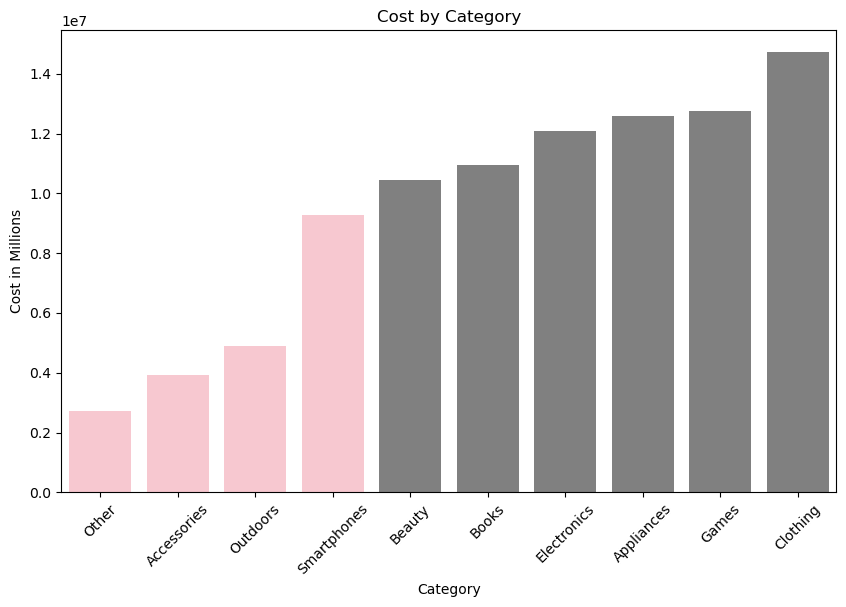

In [9]:
#visualization for cost for each category
plt.figure(figsize=(10,6)) # Set the width and height of the figure

cols = ['pink' if x < 10_000_000 else 'grey' for x in cc.cost]

#bar chart showing the sale for each category
sns.barplot(x = cc.index, y = cc["cost"], palette = cols)
#add a title
plt.title("Cost by Category")
plt.xticks(rotation=45)
#add labels
plt.ylabel("Cost in Millions")
plt.xlabel("Category");

In [10]:
#creating a subdataframe of the sales for each category from the main dataset
category_sales = sales_data[["category", "order_value_EUR"]]
new_category_sales = (category_sales.groupby("category")["order_value_EUR"].sum()).sort_values()
new_category_sales

category
Other           3262983.20
Accessories     4703930.70
Outdoors        5939075.44
Smartphones    11101654.66
Beauty         12569063.88
Books          13179978.90
Electronics    14482077.62
Appliances     15139668.73
Games          15321623.45
Clothing       17661682.13
Name: order_value_EUR, dtype: float64

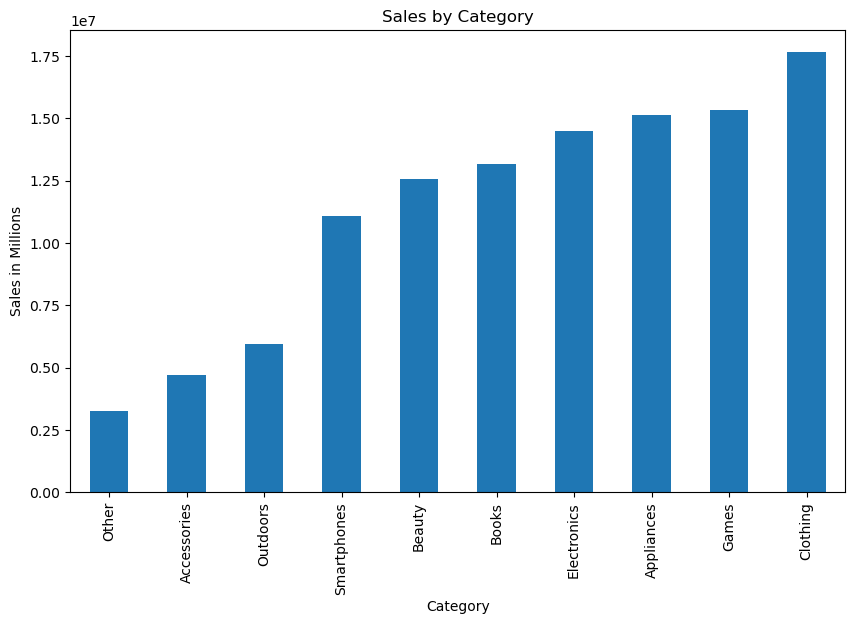

In [11]:
#making a barplot for categorical sales
plt.figure(figsize=(10,6)) # Set the width and height of the figure

#bar chart showing the sale for each category
new_category_sales.plot(kind = "bar")
#add a title
plt.title("Sales by Category")

#add labels
plt.ylabel("Sales in Millions")
plt.xlabel("Category");

In [12]:
#Getting the profit made from each category
category_profit_data = sales_data[["category", "order_value_EUR", "cost"]]
category_profit_data["profit"] = category_profit_data["order_value_EUR"] - category_profit_data["cost"]
category_profit = (category_profit_data.groupby("category")["profit"].sum()).sort_values()
cp = category_profit.to_frame() #convert series to dataframe for easy visualization with sns
cp

/tmp/ipykernel_20/2941635307.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_profit_data["profit"] = category_profit_data["order_value_EUR"] - category_profit_data["cost"]


,profit
category,
Other,549033.71
Accessories,783896.33
Outdoors,1056762.51
Smartphones,1820647.66
Beauty,2118427.43
Books,2225913.88
Electronics,2401133.00
Appliances,2534879.34
Games,2559795.77


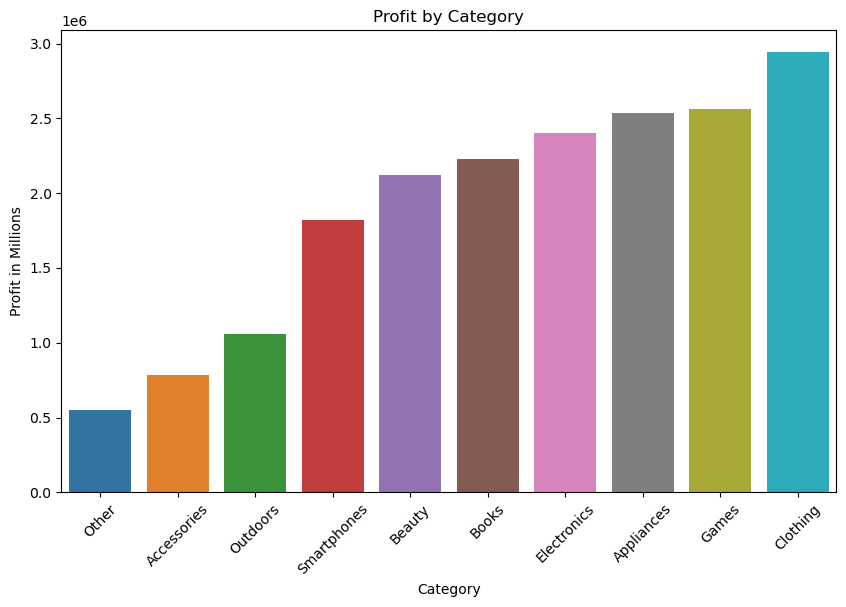

In [13]:
#making a barplot for categorical profit
plt.figure(figsize=(10,6)) # Set the width and height of the figure

#bar chart showing the sale for each category
#category_profit.plot(kind = "bar") 
sns.barplot(x = cp.index, y = cp["profit"])
#add a title
plt.title("Profit by Category")
plt.xticks(rotation=45)
#add labels
plt.ylabel("Profit in Millions")
plt.xlabel("Category");

****DEALING WITH DATASET COUNTRY WISE****

In [14]:
#creating a subset from the main dataframe 
country_data = sales_data[["country", "cost" , "order_value_EUR"]]
#getting the data for sales by country
country_sales = country_data.groupby("country")["order_value_EUR"].sum()
cs = country_sales.to_frame()
cs

,order_value_EUR
country,
Austria,190166.35
Belgium,608969.96
Bulgaria,3482144.64
Denmark,763203.51
Finland,5548035.05
France,25900678.42
Germany,2794048.53
Ireland,4952284.71
Italy,935569.30


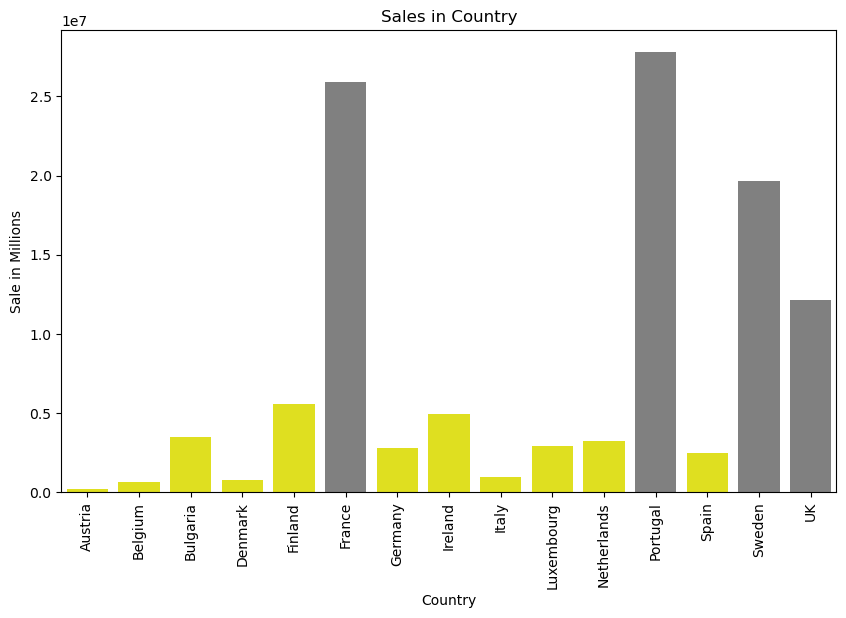

In [15]:
#visualization for sale for each country
plt.figure(figsize=(10,6)) # Set the width and height of the figure

cols = ['yellow' if x < 10_000_000 else 'grey' for x in cs.order_value_EUR]

#bar chart showing the sale for each country
sns.barplot(x = cs.index, y = cs["order_value_EUR"], palette = cols)
#add a title
plt.title("Sales in Country")
plt.xticks(rotation=90)
#add labels
plt.ylabel("Sale in Millions")
plt.xlabel("Country");

In [16]:
#profit by country
country_data["profit"] = country_data["order_value_EUR"]-country_data["cost"]
country_profit = country_data.groupby("country")["profit"].sum()
co_p = country_profit.to_frame()
co_p

/tmp/ipykernel_20/503169898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data["profit"] = country_data["order_value_EUR"]-country_data["cost"]


,profit
country,
Austria,35718.38
Belgium,94433.28
Bulgaria,605403.12
Denmark,133352.70
Finland,899285.06
France,4335004.57
Germany,465958.35
Ireland,829311.99
Italy,155458.63


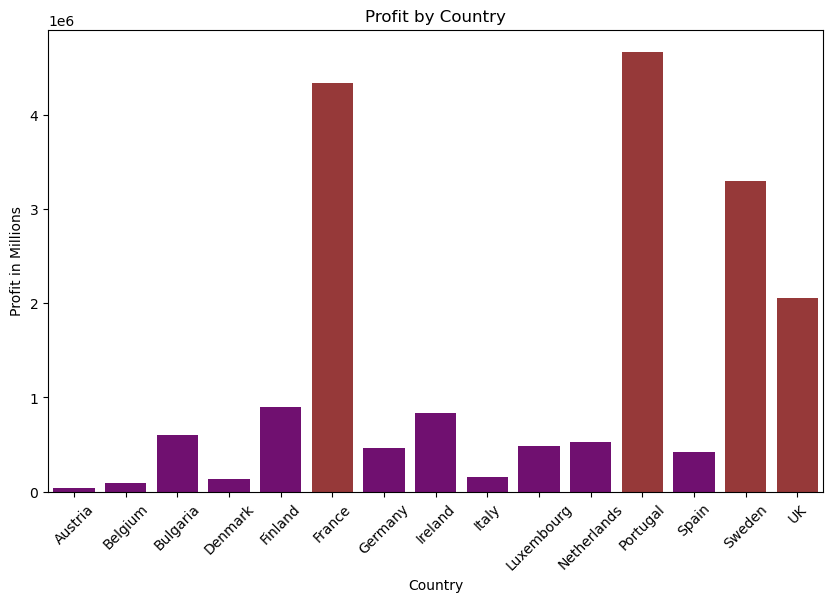

In [17]:
#visualization for profit for each country
plt.figure(figsize=(10,6)) # Set the width and height of the figure

cols = ['purple' if x < 1_000_000 else 'brown' for x in co_p.profit]

#bar chart showing the sale for each category
sns.barplot(x = co_p.index, y = co_p["profit"], palette = cols)
#add a title
plt.title("Profit by Country")
plt.xticks(rotation=45)
#add labels
plt.ylabel("Profit in Millions")
plt.xlabel("Country");

****YEARLY ANALYSIS****

From our dataset we can see that we have two years recorded: 2019 and 2020. With this, I will be making analysis and visualization for each year.

In [18]:
sales_data.head()

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id,profit
0,Sweden,17524.02,14122.61,2020-02-12,Books,Goldner-Dibbert,Maxie Marrow,Madelon Bront,Mobile,70-0511466,3401.41
1,Finland,116563.40,92807.78,2019-09-26,Games,Hilll-Vandervort,Hube Corey,Wat Bowkley,Mobile,28-6585323,23755.62
2,Portugal,296465.56,257480.34,2019-07-11,Clothing,Larkin-Collier,Celine Tumasian,Smitty Culverhouse,PC,58-7703341,38985.22
3,Portugal,74532.02,59752.32,2020-04-02,Beauty,Hessel-Stiedemann,Celine Tumasian,Aurelie Wren,PC,14-6700183,14779.70
4,Spain,178763.42,146621.76,2019-12-22,Games,Johns and Sons,Emalia Dinse,Bertha Walbrook,Tablet,15-8765160,32141.66


In [19]:
sales_data["year"] = sales_data["date"].dt.year
sales_data["month"] = sales_data["date"].dt.month
#sales_data.year.value_counts()
sales_data["month"] = sales_data["month"].replace([1,2,3,4,5,6,7,8,9,10,11,12],["Jan","Feb","March","April","May",
                                                                                "June","July","Aug","Sept","Oct","Nov","Dec"])
sales_data.head()

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id,profit,year,month
0,Sweden,17524.02,14122.61,2020-02-12,Books,Goldner-Dibbert,Maxie Marrow,Madelon Bront,Mobile,70-0511466,3401.41,2020,Feb
1,Finland,116563.40,92807.78,2019-09-26,Games,Hilll-Vandervort,Hube Corey,Wat Bowkley,Mobile,28-6585323,23755.62,2019,Sept
2,Portugal,296465.56,257480.34,2019-07-11,Clothing,Larkin-Collier,Celine Tumasian,Smitty Culverhouse,PC,58-7703341,38985.22,2019,July
3,Portugal,74532.02,59752.32,2020-04-02,Beauty,Hessel-Stiedemann,Celine Tumasian,Aurelie Wren,PC,14-6700183,14779.70,2020,April
4,Spain,178763.42,146621.76,2019-12-22,Games,Johns and Sons,Emalia Dinse,Bertha Walbrook,Tablet,15-8765160,32141.66,2019,Dec


In [20]:
#YEAR 2019
data_2019 = sales_data[sales_data["year"]==2019].sort_values("month", ascending=True)
#sales_2019.month.value_counts()
sales_2019 = (data_2019.groupby("month")["order_value_EUR"].sum()).sort_values(ascending=False)
s_2019 = sales_2019.to_frame()
s_2019.sort_index(ascending=False)

,order_value_EUR
month,
Sept,4870060.55
Oct,4372149.55
Nov,2961318.57
May,3825681.97
March,2521827.99
June,7692234.90
July,6638609.21
Jan,4516614.82
Feb,2895563.90


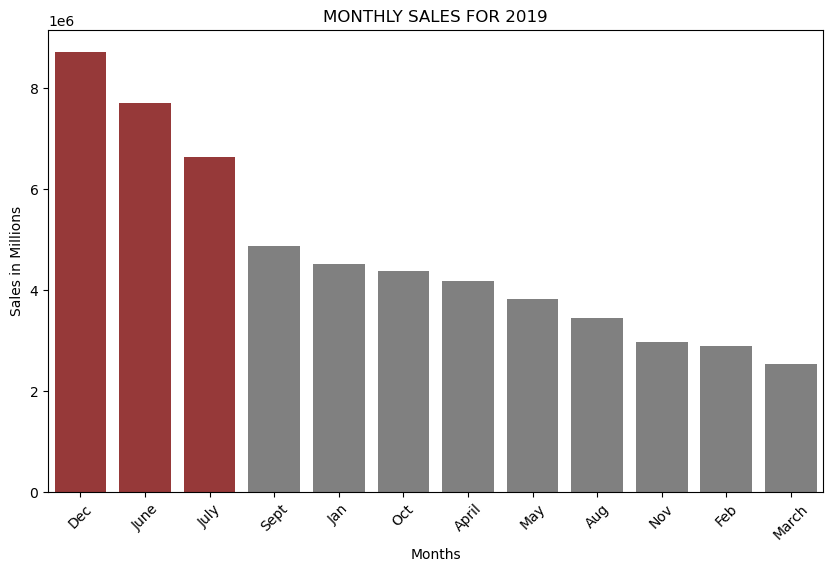

In [21]:
#visualization for 2019 SALES
plt.figure(figsize=(10,6)) # Set the width and height of the figure

cols = ['grey' if x < 5_000_000 else 'brown' for x in s_2019.order_value_EUR]

#bar chart showing the sale for each category
sns.barplot(x = s_2019.index, y = s_2019["order_value_EUR"], palette = cols)
#add a title
plt.title("MONTHLY SALES FOR 2019")
plt.xticks(rotation=45)
#add labels
plt.ylabel("Sales in Millions")
plt.xlabel("Months");

According to the above analysis, the month of **December** records the highest sales for the year 2019.


In [22]:
#Profit for 2019
profit = data_2019[["month", "cost" , "order_value_EUR"]]
profit["profit"] = profit["order_value_EUR"]-profit["cost"]
profit_2019 = profit.groupby("month")["profit"].sum()
p_2019 = profit_2019.to_frame()
p_2019

/tmp/ipykernel_20/453067515.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profit["profit"] = profit["order_value_EUR"]-profit["cost"]


,profit
month,
April,692753.62
Aug,580316.12
Dec,1514673.56
Feb,493204.90
Jan,724231.31
July,1084227.41
June,1305278.37
March,429420.62
May,648258.30


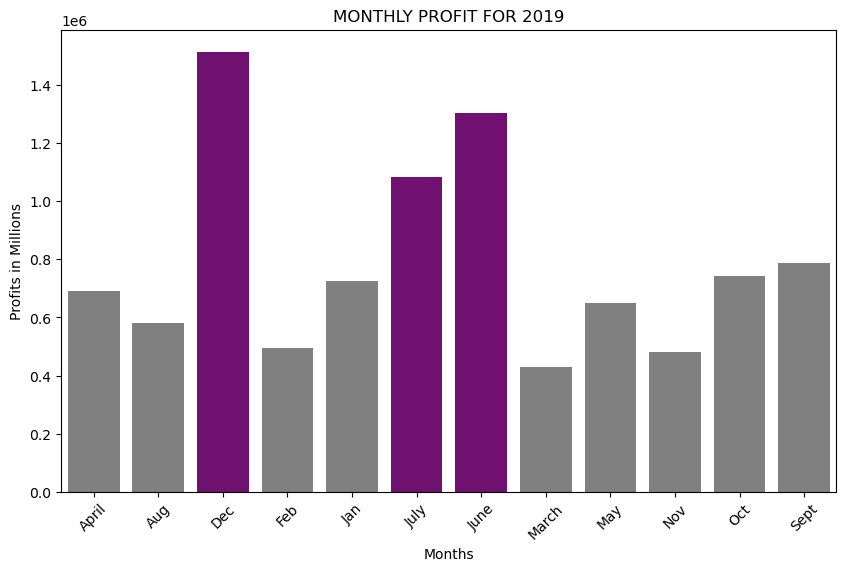

In [23]:
#visualization for 2019 monthly profit
plt.figure(figsize=(10,6)) # Set the width and height of the figure

cols = ['grey' if x < 1_000_000 else 'purple' for x in p_2019.profit]

#bar chart showing the sale for each category
sns.barplot(x = p_2019.index, y = p_2019["profit"], palette = cols)
#add a title
plt.title("MONTHLY PROFIT FOR 2019")
plt.xticks(rotation=45)
#add labels
plt.ylabel("Profits in Millions")
plt.xlabel("Months");

In [24]:
#YEAR 2020
data_2020 = sales_data[sales_data["year"]==2020].sort_values("month", ascending=True)
sales_2020 = (data_2020.groupby("month")["order_value_EUR"].sum()).sort_values(ascending=False)
s_2020 = sales_2020.to_frame()
s_2020.sort_index(ascending=False)

,order_value_EUR
month,
Sept,3778141.37
Oct,4869726.85
Nov,4734730.08
May,5537943.77
March,3579943.84
June,7158137.86
July,5242556.46
Jan,5215699.83
Feb,1959413.00


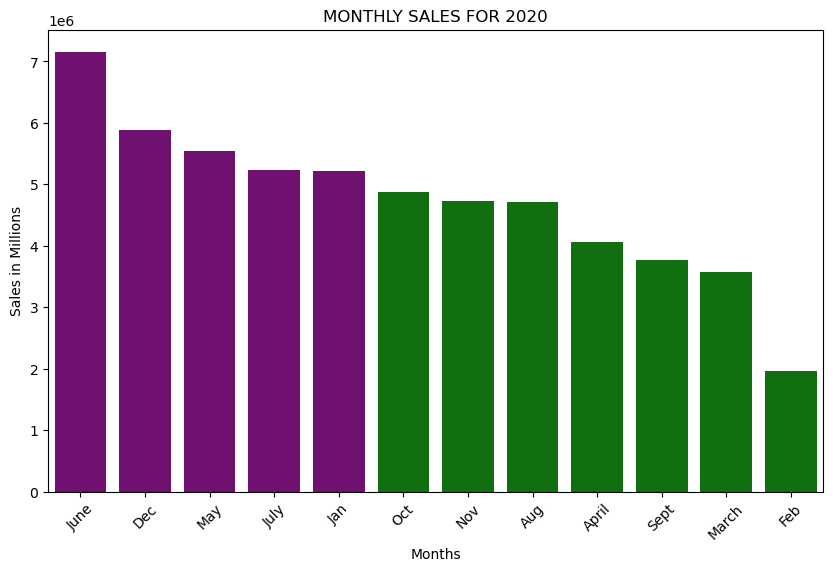

In [25]:
#visualization for 2020 SALES
plt.figure(figsize=(10,6)) # Set the width and height of the figure

cols = ['Green' if x < 5_000_000 else 'Purple' for x in s_2020.order_value_EUR]

#bar chart showing the sale for each category
sns.barplot(x = s_2020.index, y = s_2020["order_value_EUR"], palette = cols)
#add a title
plt.title("MONTHLY SALES FOR 2020")
plt.xticks(rotation=45)
#add labels
plt.ylabel("Sales in Millions")
plt.xlabel("Months");

For the year 2020 according to the above bar plot, **June** records the highest sales.

****NOTE: I will be coming to update my notebook as time goes on. Feel free to copy and edit my code. If you like my notebook, please don't forget to upvote my note book. Thank you.****